In [1]:
from cv2 import imread
from pyFusion.fusion import *
from pyFusion.iqa import metrics
from pyFusion.iqa import xideasPetrovic as xp
from pyFusion import colorConverter as cc

import matplotlib.pyplot as plt

In [2]:
# Read images

#images_path = ['images/MRI-CT/ct.png', 'images/MRI-CT/mr.png']
#images_path = ['images/MRI-PET/dg.png', 'images/MRI-PET/mr.png']
images_path = ['images/MRI-SPECT/mr.png', 'images/MRI-SPECT/tc.png']
#images_path = ['images/T1-T2/t1.png', 'images/T1-T2/t2.png']

#output = 'results/MRI-CT/'

im1 = imread(images_path[0],0)
im0 = imread(images_path[1],0)

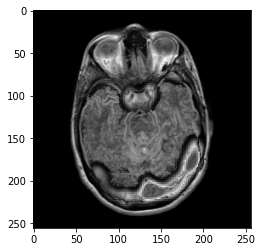

In [3]:
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/ImageFusionWavelets/MRI-CT.jpg', 0)
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/ImageFusionVisualSaliency/MRI-CT/fused.jpg', 0)

#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/GFF/MRI-CT/GFF_MRI-CT.jpg')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/GFF/MRI-PET/GFF_mri_pet.jpg')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/GFF/MRI-SPECT/GFF_mri_spect.jpg')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/GFF/T1-T2/GFF_t1_t2.jpg')

#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSST-PAPCNN/T1-T2/t1_t2.png')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSST-PAPCNN/MRI-PET/mri_pet.tif')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSST-PAPCNN/MRI-SPECT/mri_spect.tif')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSST-PAPCNN/MRI-CT/mri_ct.png')

#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT-PCNN/T1-T2/t1_t2.tif')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT-PCNN/MRI-PET/mri_pet.tif')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT-PCNN/MRI-SPECT/mri_spect.tif')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT-PCNN/MRI-CT/mri_ct.tif')

#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT/T1-T2/NSCT_t1_t2.png')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT/MRI-PET/NSCT_mri_pet.png')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT/MRI-SPECT/NSCT_mri_spect.png')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/NSCT/MRI-CT/NSCT_mri_ct.png')

#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LP-SR/T1-T2/LP_SR_t1_t2.png')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LP-SR/MRI-PET/LP_SR_mri_pet.png')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LP-SR/MRI-SPECT/LP_SR_mri_spect.png')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LP-SR/MRI-CT/LP_SR_mri_ct.png')

#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LICNN/MRI-CT/LICNN_MRI-CT.jpg')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LICNN/MRI-PET/LICNN_MRI-PET.jpg')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LICNN/MRI-SPECT/LICNN_MRI-SPECT.jpg')
#fused_image = imread('/mnt/0CDA4207DA41EE10/Cristian/Immagini/Tesi/LICNN/T1-T2/LICNN_t1_t2.jpg')

#fused_image = imread('results/MRI-CT/fusion_ct_mr.png')
#fused_image = imread('results/T1-T2/fusion_t1_t2.png')
#fused_image = imread('results/MRI-PET/fusion_dg_mr.png')
fused_image = imread('results/MRI-SPECT/fusion_mr_tc.png',0)

#--------------------------------LEGACY
#f = Image_fusion_tool('output')
#fused_image = f.pyramid_image_fusion(im0, im1, 'weighted')
#fused_image = f.weighted_average_fusion(im0,im1,0.7,0.3)
#fused_image = f.HSI_image_fusion(images[0],images[1]) # solo per immagini a colori
#fused_image = f.PCA_image_fusion(im0, im1)
#fused_image = f.PCA_fusion(im0, im1)

# fused_img = np.clip(fused_image, 0, 1)
# fused_image =(fused_image * 255).astype(np.uint8)
#----------------------------------

plt.imshow(fused_image, cmap='gray')
#plt.imshow(fused_image)#
# imwrite(output+'<nome>.jpg', fused_image)

In [4]:
wanna_mean = True

def stampa(array_di_valori):
    if wanna_mean:
        print(np.mean(array_di_valori))
    else:
        print(array_di_valori)
        

In [5]:
Q = xp.InformationPreservation(im0, im1, fused_image).calculate()
stampa(Q)
#0.7208493

0.6751632713071


In [6]:
G = xp.TotalFusionGain(im0, im1, fused_image).calculate()
stampa(G)
#0.5509691

0.4896720049332647


In [7]:
L, N = xp.FusionLossArtifact(im0, im1, fused_image).calculate()
stampa(N)
stampa(L)
#0.0021253254
#0.1909821


0.00472035087402357
0.15730915185752084


In [8]:
mse0 = metrics.mean_squared_error(im0, fused_image) 
mse1 = metrics.mean_squared_error(im1, fused_image) 
mean_mse = (mse0 + mse1) / 2
mean_mse 
#2400.500244140625

2243.2742462158203

In [9]:
en0 = metrics.entropy_2d(fused_image, im0)
en1 = metrics.entropy_2d(fused_image, im1)
mean_entropy = (en0 + en1) / 2
mean_entropy

#4.091306526016625

6.014160702448782

In [10]:
mi0 = metrics.mutual_information_2d(fused_image, im0)
mi1 = metrics.mutual_information_2d(fused_image, im1)

mean_mi = (mi0 + mi1)
mean_mi

#0.5557672815845409
#1.072541344329811
#2.278950421778484

1.5305216755783753

In [12]:
f = fused_image.ravel()
x = im0.ravel()
y = im1.ravel()

#0.2221162331371818

In [ ]:
kmi = metrics.kvalveth_MI(x, f) + metrics.kvalveth_MI(y, f)
kmi

3.26090379671396

In [ ]:
ssim0 = metrics.ssim(im0, fused_image, True)
ssim1 = metrics.ssim(im1, fused_image, True)
mean_ssim = (ssim0 + ssim1) / 2
mean_ssim

#0.6645629511168318

0.6461530452207146